In [10]:
import json
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np

targets = ['COF', 'intercept']
identifiers = ['terminal_group_1', 'terminal_group_2', 'terminal_group_3',
               'backbone', 'frac-1', 'frac-2']
%matplotlib inline
alpha = 0.2

In [3]:
# import highest scoring models from pickle files
with open('trained-models/best_COF_trained.pickle', 'rb') as f:
    COF_model = pickle.load(f)
with open('trained-models/best_intercept_trained.pickle', 'rb') as f:
    intercept_model = pickle.load(f)
# import list of features included in highest scoring models from json
with open('json-files/best_features.json', 'r') as f:
    best_features = json.load(f)

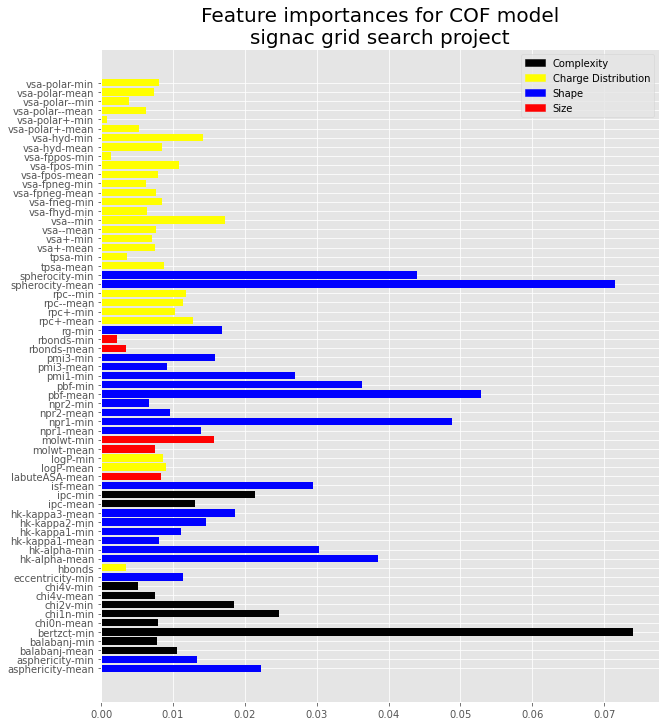

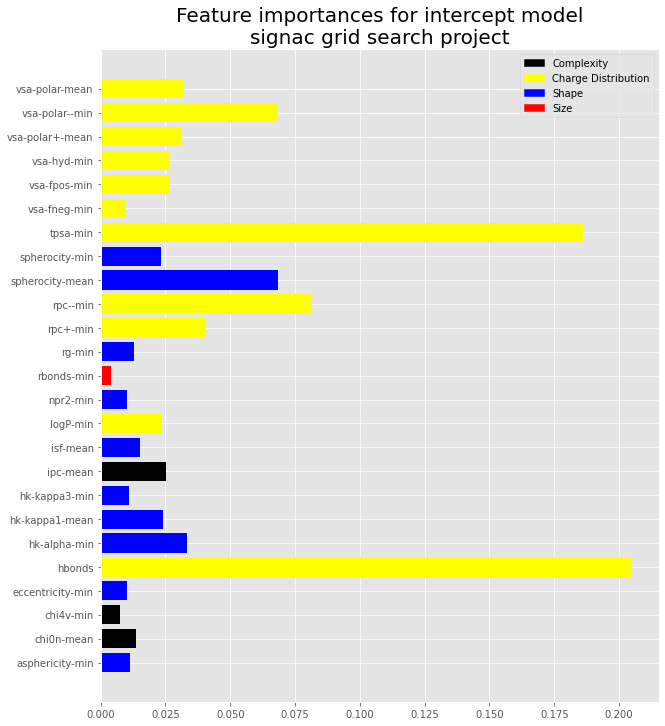

In [4]:
# fetch feature clusters json file to categorize features in plot
with open('json-files/feature-clusters.json', 'r') as f:
    clusters = json.load(f)

# add means and mins
for category in clusters:
    stuff_to_add = []
    for feature_name in clusters[category]:
        stuff_to_add.append(feature_name + '-min')
        stuff_to_add.append(feature_name + '-mean')
    clusters[category].extend(stuff_to_add)

feature_importances = {'COF': (best_features['COF'], COF_model.feature_importances_.tolist()), \
                      'intercept': (best_features['intercept'], intercept_model.feature_importances_.tolist())}        
    
for model in feature_importances:
    
    # the plot will color the bars representing the different features according to their category
    # so color_list will specify the color for each feature
    feature_list = feature_importances[model][0]
    color_list = [None] * len(feature_list) # same size as feature list
    
    # mapping from category in feature_clusters.json to color on plot
    category2color = {'complexity': 'black', 'qdist': 'yellow', 'shape': 'blue', 'size': 'red'}
    categories = list(category2color.keys())
    
    # add colors to color_list that match corresponding element of feature_list
    for i, feature in enumerate(feature_list):
        for category in clusters:
            if feature in clusters[category]:
                color = category2color[category]
                color_list[i] = color

    # make sure color_list is populated completely
    assert (None not in color_list), \
        'some features do not fit into categories, namely {}'.format(feature_list[color_list == None])
    
    # plot feature importances
    plt.style.use('ggplot')
    plt.figure(figsize = (10, 12))
    plt.barh(feature_importances[model][0], feature_importances[model][1], color=color_list);
    plt.title('Feature importances for {} model\nsignac grid search project'.format(model), fontsize=20)
    
    handles = [plt.Rectangle((0,0),1,1, color=category2color[cat]) for cat in categories]
    plt.legend(handles, ['Complexity', 'Charge Distribution', 'Shape', 'Size'])
    
    
    

In [4]:
# import json files for cross validated models
predict_results = dict()
for target in ['COF', 'intercept']:
    with open('json-files/{}_predicted.json'.format(target)) as file:
        predict_results[target] = json.load(file) 

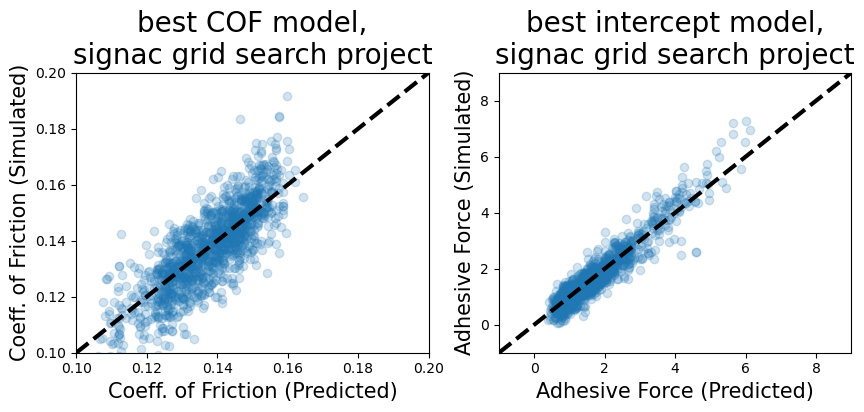

In [5]:
plt.style.use('default')
# Plot the predicted vs simulated target values for the models
results = {'COF': {'x': [], 'y': []},
           'intercept': {'x': [], 'y': []}}
for target in ['COF', 'intercept']:
    for idx in predict_results[target]:
        results[target]['x'].append(predict_results[
            target][str(idx)]['predicted-{}'.format(target)])
        results[target]['y'].append(predict_results[
            target][str(idx)]['simulated-{}'.format(target)])

plt.figure(figsize=(10, 8))
plt.subplot(221)
plt.title('best COF model,\nsignac grid search project', fontsize=20)
plt.xlabel('Coeff. of Friction (Predicted)', fontsize=15)
plt.ylabel('Coeff. of Friction (Simulated)', fontsize=15)
plt.scatter(results['COF']['x'], results['COF']['y'], alpha=alpha)
plt.xlim(0.1, 0.2)
plt.ylim(0.1, 0.2)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

plt.subplot(222)
plt.title('best intercept model,\nsignac grid search project', fontsize=20)
plt.xlabel('Adhesive Force (Predicted)', fontsize=15)
plt.ylabel('Adhesive Force (Simulated)', fontsize=15)
plt.scatter(results['intercept']['x'], results['intercept']['y'], alpha=alpha)
plt.xlim(-1, 9)
plt.ylim(-1, 9)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

plt.savefig('./png-files/signac_project.png', dpi=500,  bbox_inches = 'tight')



In [43]:
# import models with reduced number of features based on importances, and import reduced features
models = dict()
for target in targets:
    for i in range(1, 4):
        with open('trained-models/{}_{}_trained.pickle'.format(target, i), 'rb') as f:
            models['{}_{}'.format(target, i)] = pickle.load(f)

with open('json-files/reduced_features.json', 'r') as f:
    reduced_features = json.load(f)
    
# get test data for scoring
test_data = dict()
for target in targets:
    path_to_test = 'csv-files/{}_testing.csv'.format(target)
    with open(path_to_test, 'r') as test_file:
        test_data[target] = pd.read_csv(test_file, index_col=0)

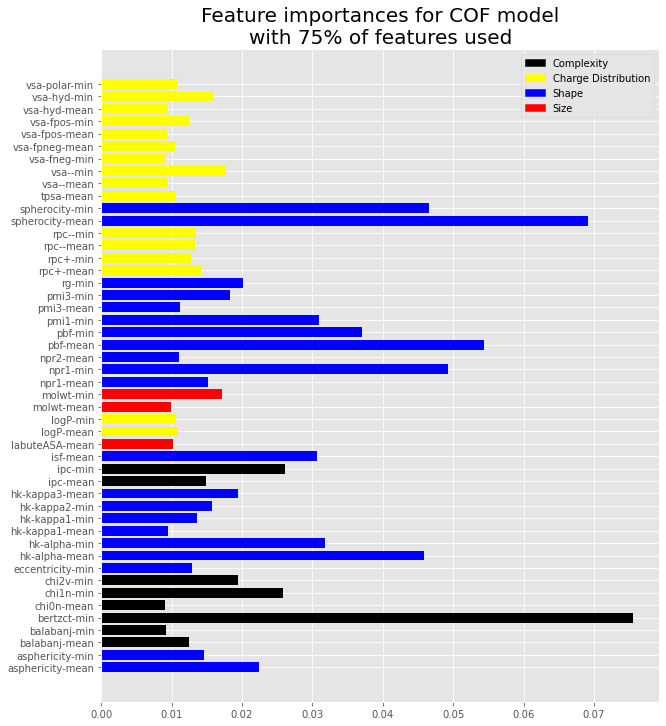

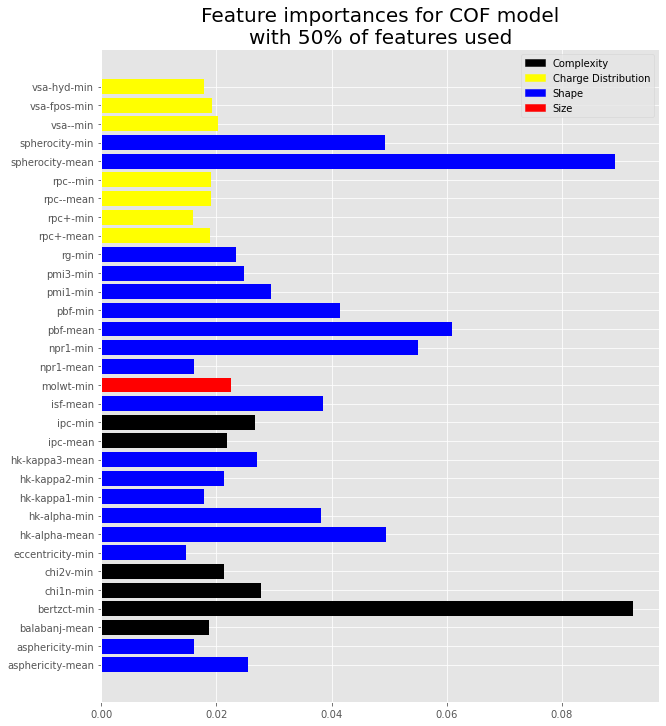

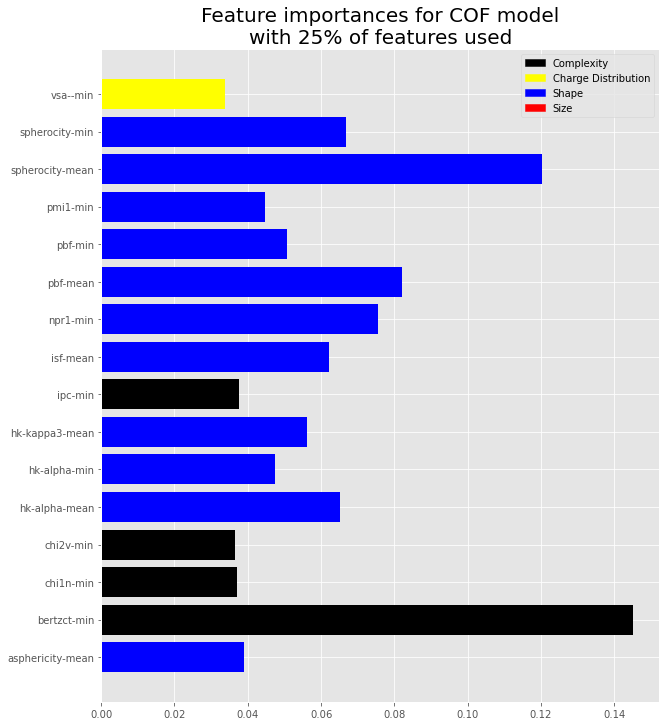

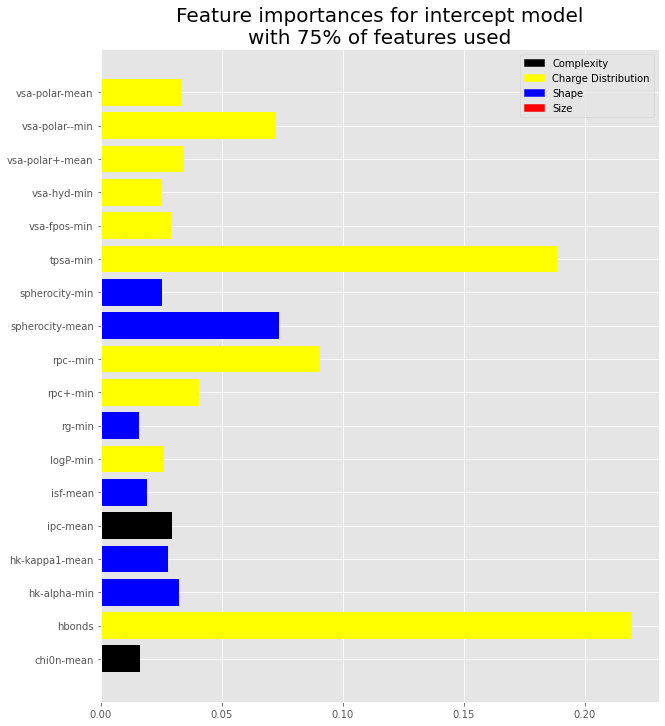

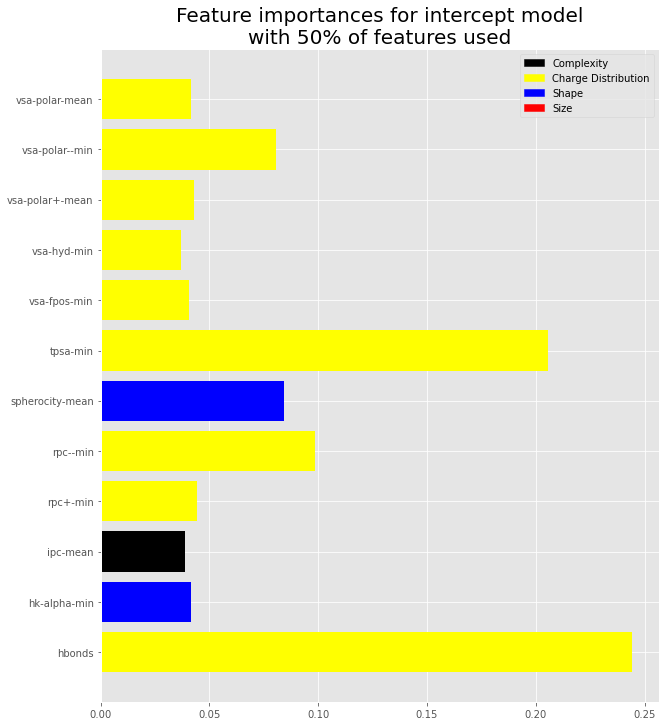

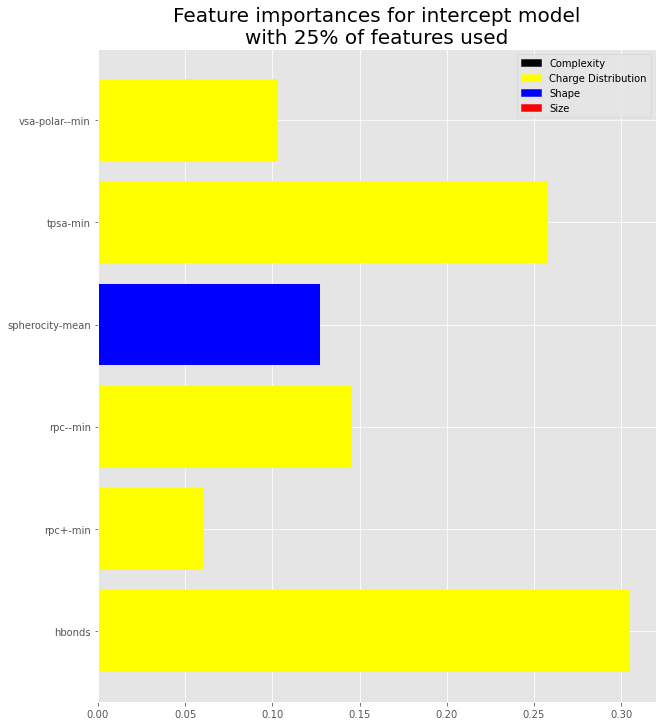

In [48]:
# plot feature importances of the models with the number of features reduced based on the
# feature importances from the models with the highest r^2 scores on the test data from the
# parameter grid search facilitated by the signac-flow package

feature_importances = dict()
for target in targets:
    for i2 in range(1,4):
        feature_importances['{}_{}'.format(target, i2)] = \
            (reduced_features['{}_{}'.format(target, i2)], models['{}_{}'.format(target, i2)].feature_importances_.tolist())    

for model in feature_importances:
    
    # the plot will color the bars representing the different features according to their category
    # so color_list will specify the color for each feature
    feature_list = feature_importances[model][0]
    color_list = [None] * len(feature_list) # same size as feature list
    
    # mapping from category in feature_clusters.json to color on plot
    category2color = {'complexity': 'black', 'qdist': 'yellow', 'shape': 'blue', 'size': 'red'}
    categories = list(category2color.keys())
    
    # add colors to color_list that match corresponding element of feature_list
    for idx, feature in enumerate(feature_list):
        for category in clusters:
            if feature in clusters[category]:
                color = category2color[category]
                color_list[idx] = color

    # make sure color_list is populated completely
    assert (None not in color_list), \
        'some features do not fit into categories, namely {}'.format(feature_list[color_list == None])
    
    # plot feature importances
    plt.style.use('ggplot')
    plt.figure(figsize = (10, 12))
    plt.barh(feature_importances[model][0], feature_importances[model][1], color=color_list);
    
    target, target_idx = model.split('_')
    pct_of_features = 100 - 25*int(target_idx)
    plt.title('Feature importances for {} model\nwith {}% of features used'.format(target, pct_of_features), fontsize=20)
    
    handles = [plt.Rectangle((0,0),1,1, color=category2color[cat]) for cat in categories]
    plt.legend(handles, ['Complexity', 'Charge Distribution', 'Shape', 'Size'])
    
    
    

In [49]:
# import json files for models with the number of features reduced based on the
# feature importances from the models with the highest r^2 scores on the test data from the
# parameter grid search facilitated by the signac-flow package
predict_results = dict()
for target in ['COF', 'intercept']:
    for i3 in range(1, 4):
        with open('json-files/{}_{}_predicted.json'.format(target, i3)) as file:
            predict_results['{}_{}'.format(target, i3)] = json.load(file) 

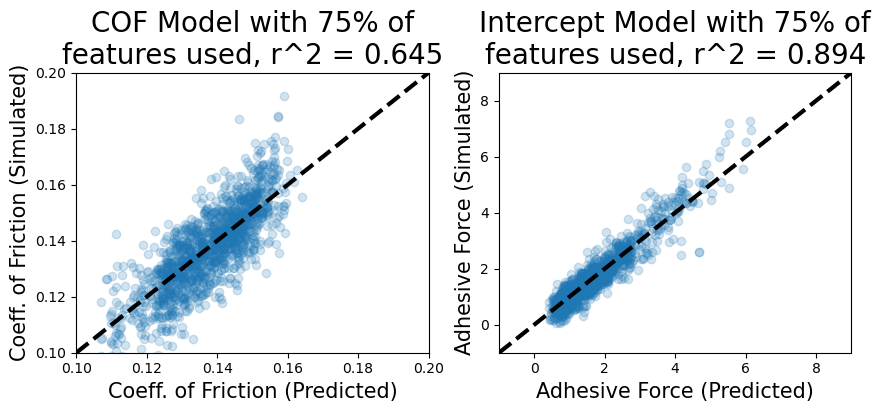

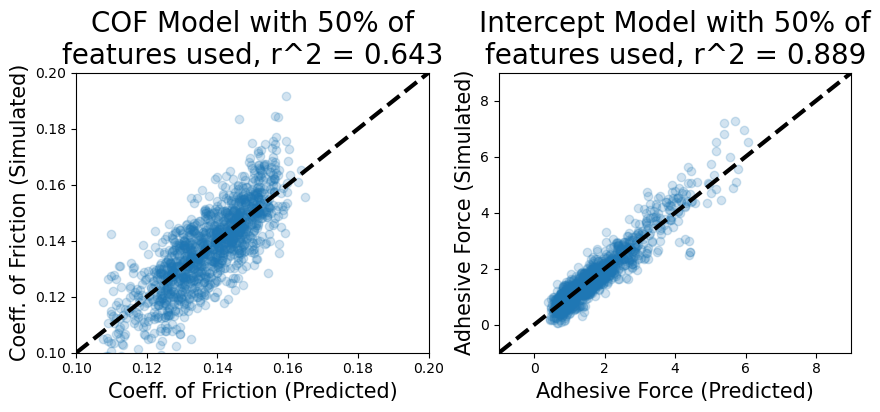

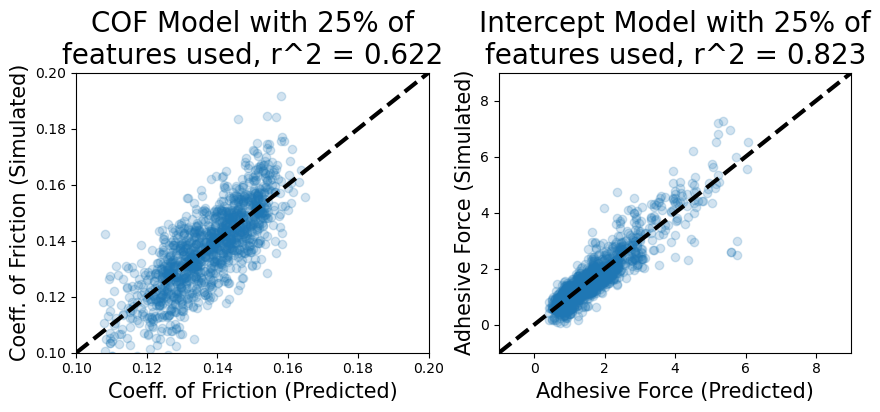

In [52]:
plt.style.use('default')

for i4 in range(1, 4):
    pct_features_used = 100 - 25*i4
    results = {'COF': {'x': [], 'y': []},
               'intercept': {'x': [], 'y': []}}
    for target in targets:
        for idx in predict_results['{}_{}'.format(target, i4)]:
            results[target]['x'].append(predict_results['{}_{}'.format(target, i4)][str(idx)]['predicted-{}'.format(target)])
            results[target]['y'].append(predict_results['{}_{}'.format(target, i4)][str(idx)]['simulated-{}'.format(target)])
        
    plt.figure(figsize=(10, 8))
    
    # score COF and intercept models
    COF_test_X = test_data['COF'][reduced_features['COF_{}'.format(i4)]]
    COF_test_y = test_data['COF']['COF']
    
    intercept_test_X = test_data['intercept'][reduced_features['intercept_{}'.format(i4)]]
    intercept_test_y = test_data['intercept']['intercept']
    
    COF_score = models['COF_{}'.format(i4)].score(COF_test_X, COF_test_y)
    intercept_score = models['intercept_{}'.format(i4)].score(intercept_test_X, intercept_test_y)
    
    plt.subplot(221)
    plt.title('COF Model with {}% of\nfeatures used, r^2 = {}'.format(
        pct_features_used, round(COF_score, 3)), fontsize=20)
    plt.xlabel('Coeff. of Friction (Predicted)', fontsize=15)
    plt.ylabel('Coeff. of Friction (Simulated)', fontsize=15)
    plt.scatter(results['COF']['x'], results['COF']['y'], alpha=alpha)
    plt.xlim(0.1, 0.2)
    plt.ylim(0.1, 0.2)
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)

    plt.subplot(222)
    plt.title('Intercept Model with {}% of\nfeatures used, r^2 = {}'.format(
        pct_features_used, round(intercept_score, 3)), fontsize=20)
    plt.xlabel('Adhesive Force (Predicted)', fontsize=15)
    plt.ylabel('Adhesive Force (Simulated)', fontsize=15)
    plt.scatter(results['intercept']['x'], results['intercept']['y'], alpha=alpha)
    plt.xlim(-1, 9)
    plt.ylim(-1, 9)
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
    
    plt.savefig('./png-files/model-{}.png'.format(i4), dpi=500,  bbox_inches = 'tight')
